<a href="https://colab.research.google.com/github/NagarajaN-Nethi/Task-2---To-Explore-Supervised-Machine-Learning/blob/master/Task_2_To_Explore_Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task #2**  - To ExploreSupervised Machine Learning



## Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 8
import seaborn as sns

## Importing the Data

In [ ]:
df = pd.read_csv('http://bit.ly/w-data')

## Various information about the data

In [ ]:
df.shape

(25, 2)

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##Scatter plot to check if there is any linear relationship

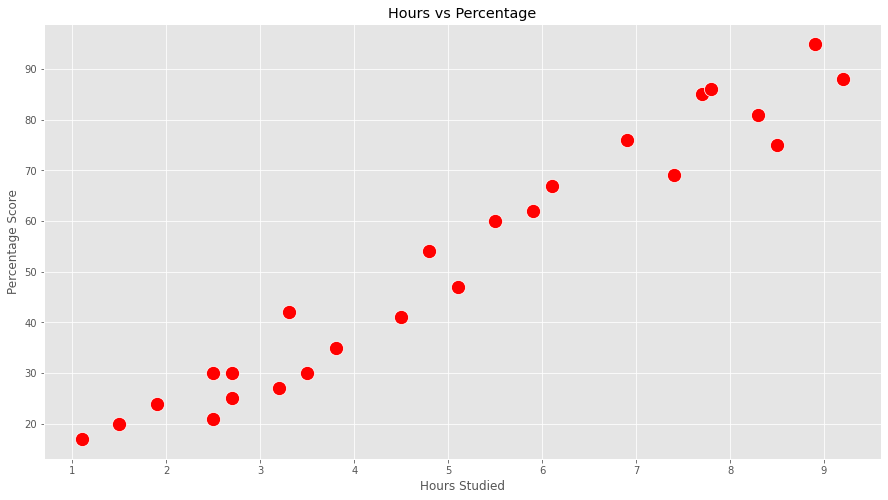

In [ ]:
plt.style.use('ggplot')
sns.scatterplot(x = 'Hours',
                y = 'Scores',
                data = df,
                color = 'red',
                s = 200)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score');

### As we can see there is a linear relationship between number of hours studied and the score received. ie As the number of hours studied increases, the score increases

### Pre Processing the Data

In [ ]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

### Splitting the Data to Train and Test Set

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state = 14) 

In [ ]:
print('The number of observations in the training set is', X_train.shape[0])
print('The number of observations in the test set is', X_test.shape[0])

The number of observations in the training set is 20
The number of observations in the test set is 5


### Building the Linear Regrssion Model

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression(n_jobs = -1)  
regressor.fit(X_train, y_train);

In [ ]:
print('The intercept of the model is',regressor.intercept_)
print('The coefficient of the model is',regressor.coef_[0])
print('The score of model on the train set',regressor.score(X_train, y_train))
print('The score of model on the test set',regressor.score(X_test, y_test))

The intercept of the model is 0.6925589152057796
The coefficient of the model is 10.171831880720285
The score of model on the train set 0.9531798874119468
The score of model on the test set 0.9467192864357015



### Plotting the fitted line

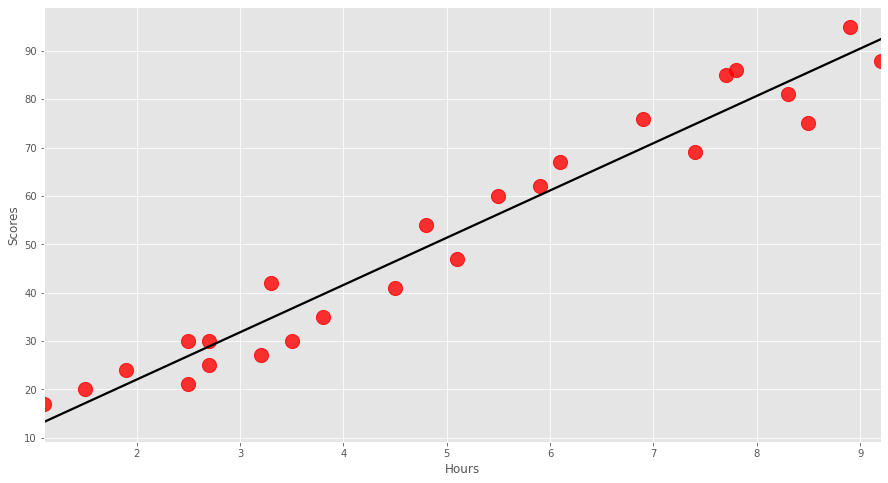

In [ ]:
plt.style.use('ggplot')
sns.regplot(x = 'Hours',
            y = 'Scores',
            data = df,
            ci = None,
            scatter_kws={"color": "red", 's':200}, line_kws={"color": "black"})

## Predicting the Test Set using the Fitted Model

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
0,75,87.153130
1,47,52.568902
2,24,20.019039
3,95,91.221863
4,17,11.881574


### Evaluating the Model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
print('The Mean Absolute Error is',mean_absolute_error(y_test, y_pred))
print('The Mean Squeared Error is',mean_squared_error(y_test, y_pred))
print('The Median Absolute Error is',median_absolute_error(y_test, y_pred))
print('The R-Squared is',r2_score(y_test, y_pred))

The Mean Absolute Error is 6.119911056403737
The Mean Squeared Error is 47.00637673496682
The Median Absolute Error is 5.118426016001905
The R-Squared is 0.9467192864357014


### Predicting the score when studying for 9.25 hours

In [ ]:
regressor.predict([[9.25]])[0]

94.78200381186842

When a student studies for 9.25 hours, the score would be approximately 93.69173248737539